In [2]:
from PIL import Image
from numpy import *
from pylab import *
from scipy import ndimage
import warp
import homography

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


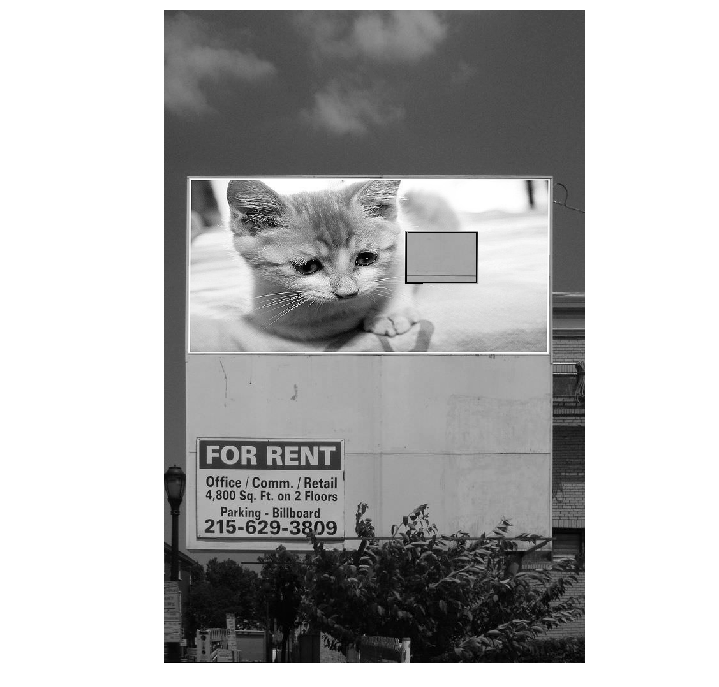

In [11]:
im1 = array(Image.open('cat.jpg').convert('L'))
im1[100:200, 300:400] = 0
im2 = array(Image.open('bill_board_for_rent.jpg').convert('L'))
tp = array([[264, 538, 540, 264],[40, 36, 605, 605],[1, 1,1,1]])
#tp = array([[675, 826, 826, 677],[55, 52, 281, 277],[1, 1,1,1]])
im3 = warp.image_in_image(im1, im2, tp)
figure(figsize=(12, 12))
gray()
imshow(im3)
axis('equal')
axis('off')
show()

In [12]:
def image_in_image1(im1, im2, tp):
    """ Put im1 in im2 with an affine transformation
    such that corners are as close to tp as possible.
    tp are homogeneous and counter-clockwise from top left. """

    #points to warp from
    im1 = im1+0.1
    m, n = im1.shape[:2]
    fp = array([[0,m,m,0],[0,0,n,n],[1,1,1,1]])

    #computer affine trasnform and apply
    H = homography.Haffine_from_points(tp,fp)
    im1_t = ndimage.affine_transform(im1, H[:2, :2],
            (H[0,2],H[1,2]), im2.shape[:2])
    alpha = (im1_t > 0)

    return (1-alpha)*im2 + alpha*im1_t

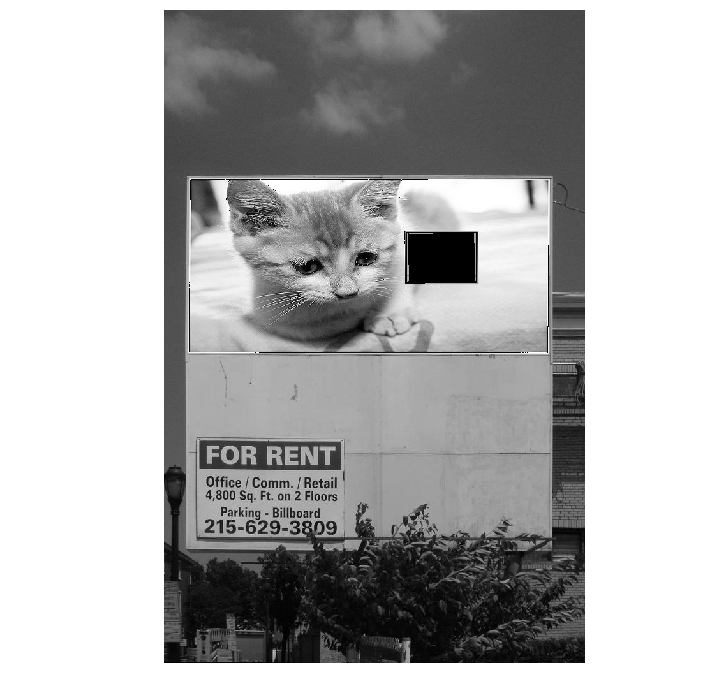

In [10]:
im1 = array(Image.open('cat.jpg').convert('L'))
im1[100:200, 300:400] = 0
im2 = array(Image.open('bill_board_for_rent.jpg').convert('L'))
tp = array([[264, 538, 540, 264],[40, 36, 605, 605],[1, 1,1,1]])
#tp = array([[675, 826, 826, 677],[55, 52, 281, 277],[1, 1,1,1]])
im3 = image_in_image1(im1, im2, tp)
figure(figsize=(12, 12))
gray()
imshow(uint8(im3))
axis('equal')
axis('off')
show()